<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S15-Self-Training/Self_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SELF-TRAINING

## Resumen

En este tutorial veremos cómo utilizar el paradigma de aprendizaje semi-supervisado para aprender de datos etiquetados y no etiquetados de manera simultanea.

En particular usaremos el algortimo semi-supervisado llamado self-training El agoritmos self-training utiliza un clasificador tradicional como base para aprender de manera iterativa. En cada iteración el algoritmo etiqueta algunas instancias que luego agrega al conjunto de instancias con etiquetas. Este conjunto aumentado es utilizado para construir un nuevo modelo de aprendizaje, bajo el supuesto que esta nuevo conjunto de datos permite mejorar la capacidad de reconocimiento del modelo de clasificacion empleado,  ya que cuenta con más datos a disposición.

## Aprendizaje Semi-supervisado

En el área de Machine Learning, entre más datos mejor. Particularmente en aprendizaje supervisado, los datos deben estar etiquetados. Si existen datos pero están sin etiquetar, estos no pueden ser utilizados por los algoritmos supervisados tradicionales. Muchas veces se consideran solamente los datos etiquetados y simplemente se desechan aquellos datos que no lo están.

Etiquetar los datos puede ser muy consumidor de tiempo entonces a veces es más conveniente desecharlos.

Además, Etiquetar datos puede ser costoso en terminos monetarios, porque es necesario pagarle a una persona o designar recursos para realizar ese proceso.

Entonces surge la pregunta de si es posible utilizar esa masa de datos sin etiquetar para aumentar las capacidades de las predicciones.

Allí surge el aprendizaje semi supervisado que utiliza simultáneamente datos etiquetados y sin etiquetar para construir modelos predictivos.


## Self-training

 De manera muy resumida, Self-training es un tipo de aprendizaje semi-supervisado. Estos clasificadores aprenden a partir de un conjunto de datos etiquetados muy pequeño. Con estos recursos se construyen modelos de clasificación para estimar las pseudo etiquetas de instancias sin categorizar. Seguidamente, estas nuevas instancias con pseudo etiquetas son agregadas al conjunto de datos etiquetados. Este conjunto  aumentado es utilizado para entrenar un nuevo modelo de clasificación. La premisa es que esta acción conlleva a predicciones más precisas.

 El procedimineto general del algoritmo self-training se lista a continuacion:



* Paso 1: Dividir las instancias de datos etiquetados en conjuntos de entrenamiento y de validación. A continuación, entrenar un algoritmo de clasificación con los datos de entrenamiento etiquetados.

* Paso 2: Utilizar el clasificador entrenado para predecir las etiquetas para todos los casos de datos no etiquetados. De estas etiquetas predichas, las que tienen la mayor probabilidad de ser correctas se adoptan como "pseudoetiquetas".

(Un par de variaciones del paso 2: a) Todas las etiquetas predichas pueden adoptarse como "pseudoetiquetas" a la vez, sin tener en cuenta la probabilidad, o b) Los datos "pseudoetiquetados" pueden ponderarse según la confianza en la predicción).

* Paso 3: Concatenar los datos "pseudoetiquetados" con los datos de entrenamiento etiquetados. Vuelva a entrenar el clasificador con los datos de entrenamiento combinados "pseudoetiquetados" y etiquetados.


* Paso 4: Utilice el clasificador entrenado para predecir las etiquetas de clase de los casos de datos de prueba etiquetados. Evalúe el rendimiento del clasificador utilizando las métricas de su elección.
(Los pasos 1 a 4 pueden repetirse hasta que las etiquetas de clase predichas en el paso 2 no alcancen un umbral de probabilidad específico, o hasta que no queden más datos sin etiquetar).





* Paso 1: Entrenar un clasificador con los datos de entrenamiento etiquetados.

* Paso 2: Utilizar el clasificador para predecir las etiquetas de todos los datos no etiquetados, así como las probabilidades de esas predicciones. En este caso, sólo adoptaré "pseudoetiquetas" para las predicciones con una probabilidad superior al 99%.

* Paso 3: Concatenar los datos "pseudoetiquetados" con los datos de entrenamiento etiquetados y volver a entrenar el clasificador con los datos concatenados.

* Paso 4: Utilice el clasificador entrenado para hacer predicciones para los datos de prueba etiquetados y evalúe el clasificador.
Repita los pasos 1 a 4 hasta que no haya más predicciones con una probabilidad superior al 99%, o hasta que no queden datos sin etiquetar.
Vea el código siguiente para mi implementación de estos pasos en Python, utilizando un bucle while.



#STEP 1: OBTAIN DATA
Para demostrar el poder del algoritmo Self-Training, utilizaremos el conjunto de datos surgical_deepnet qué [se encuentra disponible](https://raw.githubusercontent.com/castudil/Machine-Learning/main/S15-Self-Training/Surgical-deepnet.csv) en el [repositorio GitHub del curso](https://github.com/castudil/Machine-Learning).

Este conjunto de datos ha sido creado para realizar clasificación binaria y contiene datos de más de 14.000 cirugías. Contiene atributos como índice de masa corporal, edad, ademas de una variedad de otros campos. Existe una variable objetivo llamada “complication” que registra si el paciente sufrió complicaciones como resultado de la cirugía que se le aplicó. Evidentemente, desarrollar un modelo que prediga de manera precisa si el paciente sufrirá complicaciones después de la cirugía, es de mucho interés para prestadores de servicios de salud y compañías de seguros.


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

URL='https://raw.githubusercontent.com/castudil/Machine-Learning/main/S15-Self-Training/Surgical-deepnet.csv'

#nRowsRead = 1000 # specify 'None' if want to read whole file
# Surgical-deepnet.csv has 14635 rows in reality, but we are only loading/previewing the first 1000 rows
#data = pd.read_csv(URL, delimiter=',', nrows = nRowsRead)

data = pd.read_csv(URL, delimiter=',')# read alll the values
data.dataframeName = 'Surgical-deepnet.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')
type(data)

There are 14635 rows and 25 columns


pandas.core.frame.DataFrame

#STEP 2: SCRUB DATA

In [ ]:
data.head(5)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


Lo primero que haremos con los datos y transformarlos al formato data Frame. Luego separaremos la componente de las variables independientes de las etiquetas.

Finalmente el conjunto de datos lo dividiremos en entrenamiento y test. En este caso el conjunto de Test corresponde a un 30% de los datos originales y se dejan intactos para validar el proceso de aprendizaje.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# extraer los datos
X = data.drop('complication', axis=1)  
# extraer las etiquetas
y = data.complication #target variables

# conjunto separar los conjuntos de datos en entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
#X_train.head()

Ahora procedemos a dividir el conjunto de entrenamiento. Dado que se trata de un problema de aprendizaje semi supervisado, dividiremos el conjunto en dos mitades una que mantendrá las etiquetas y otras que consideraremos que no tienen etiquetas disponibles.

In [ ]:
X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
#X_l.head()

Verificamos que la suma de los elementos pertenecientes a los conjuntos etiquetados y sin etiquetar sean iguales al tamaño del conjunto de entrenamiento.

In [ ]:
# summarize training set size
print('Labeled train set has ', X_l.shape[0], 'instances.')
print('Unlabeled train set considers ', X_u.shape[0], 'items.')
# summarize test set size
print('Additionally, the test set includes ', X_test.shape[0],' observations.')
print(f'there are {X_l.shape[0]} labeled instances and {X_u.shape[0]} unlabeled ones which sums {X_l.shape[0]+X_u.shape[0]} instances')
print(f'also, the training set has {X_train.shape[0]} instances')


Labeled train set has  5122 instances.
Unlabeled train set considers  5122 items.
Additionally, the test set includes  4391  observations.
there are 5122 labeled instances and 5122 unlabeled ones which sums 10244 instances
also, the training set has 10244 instances


#STEP 3 : EXPLORE



In [ ]:
import matplotlib.pyplot as plt # plotting

# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

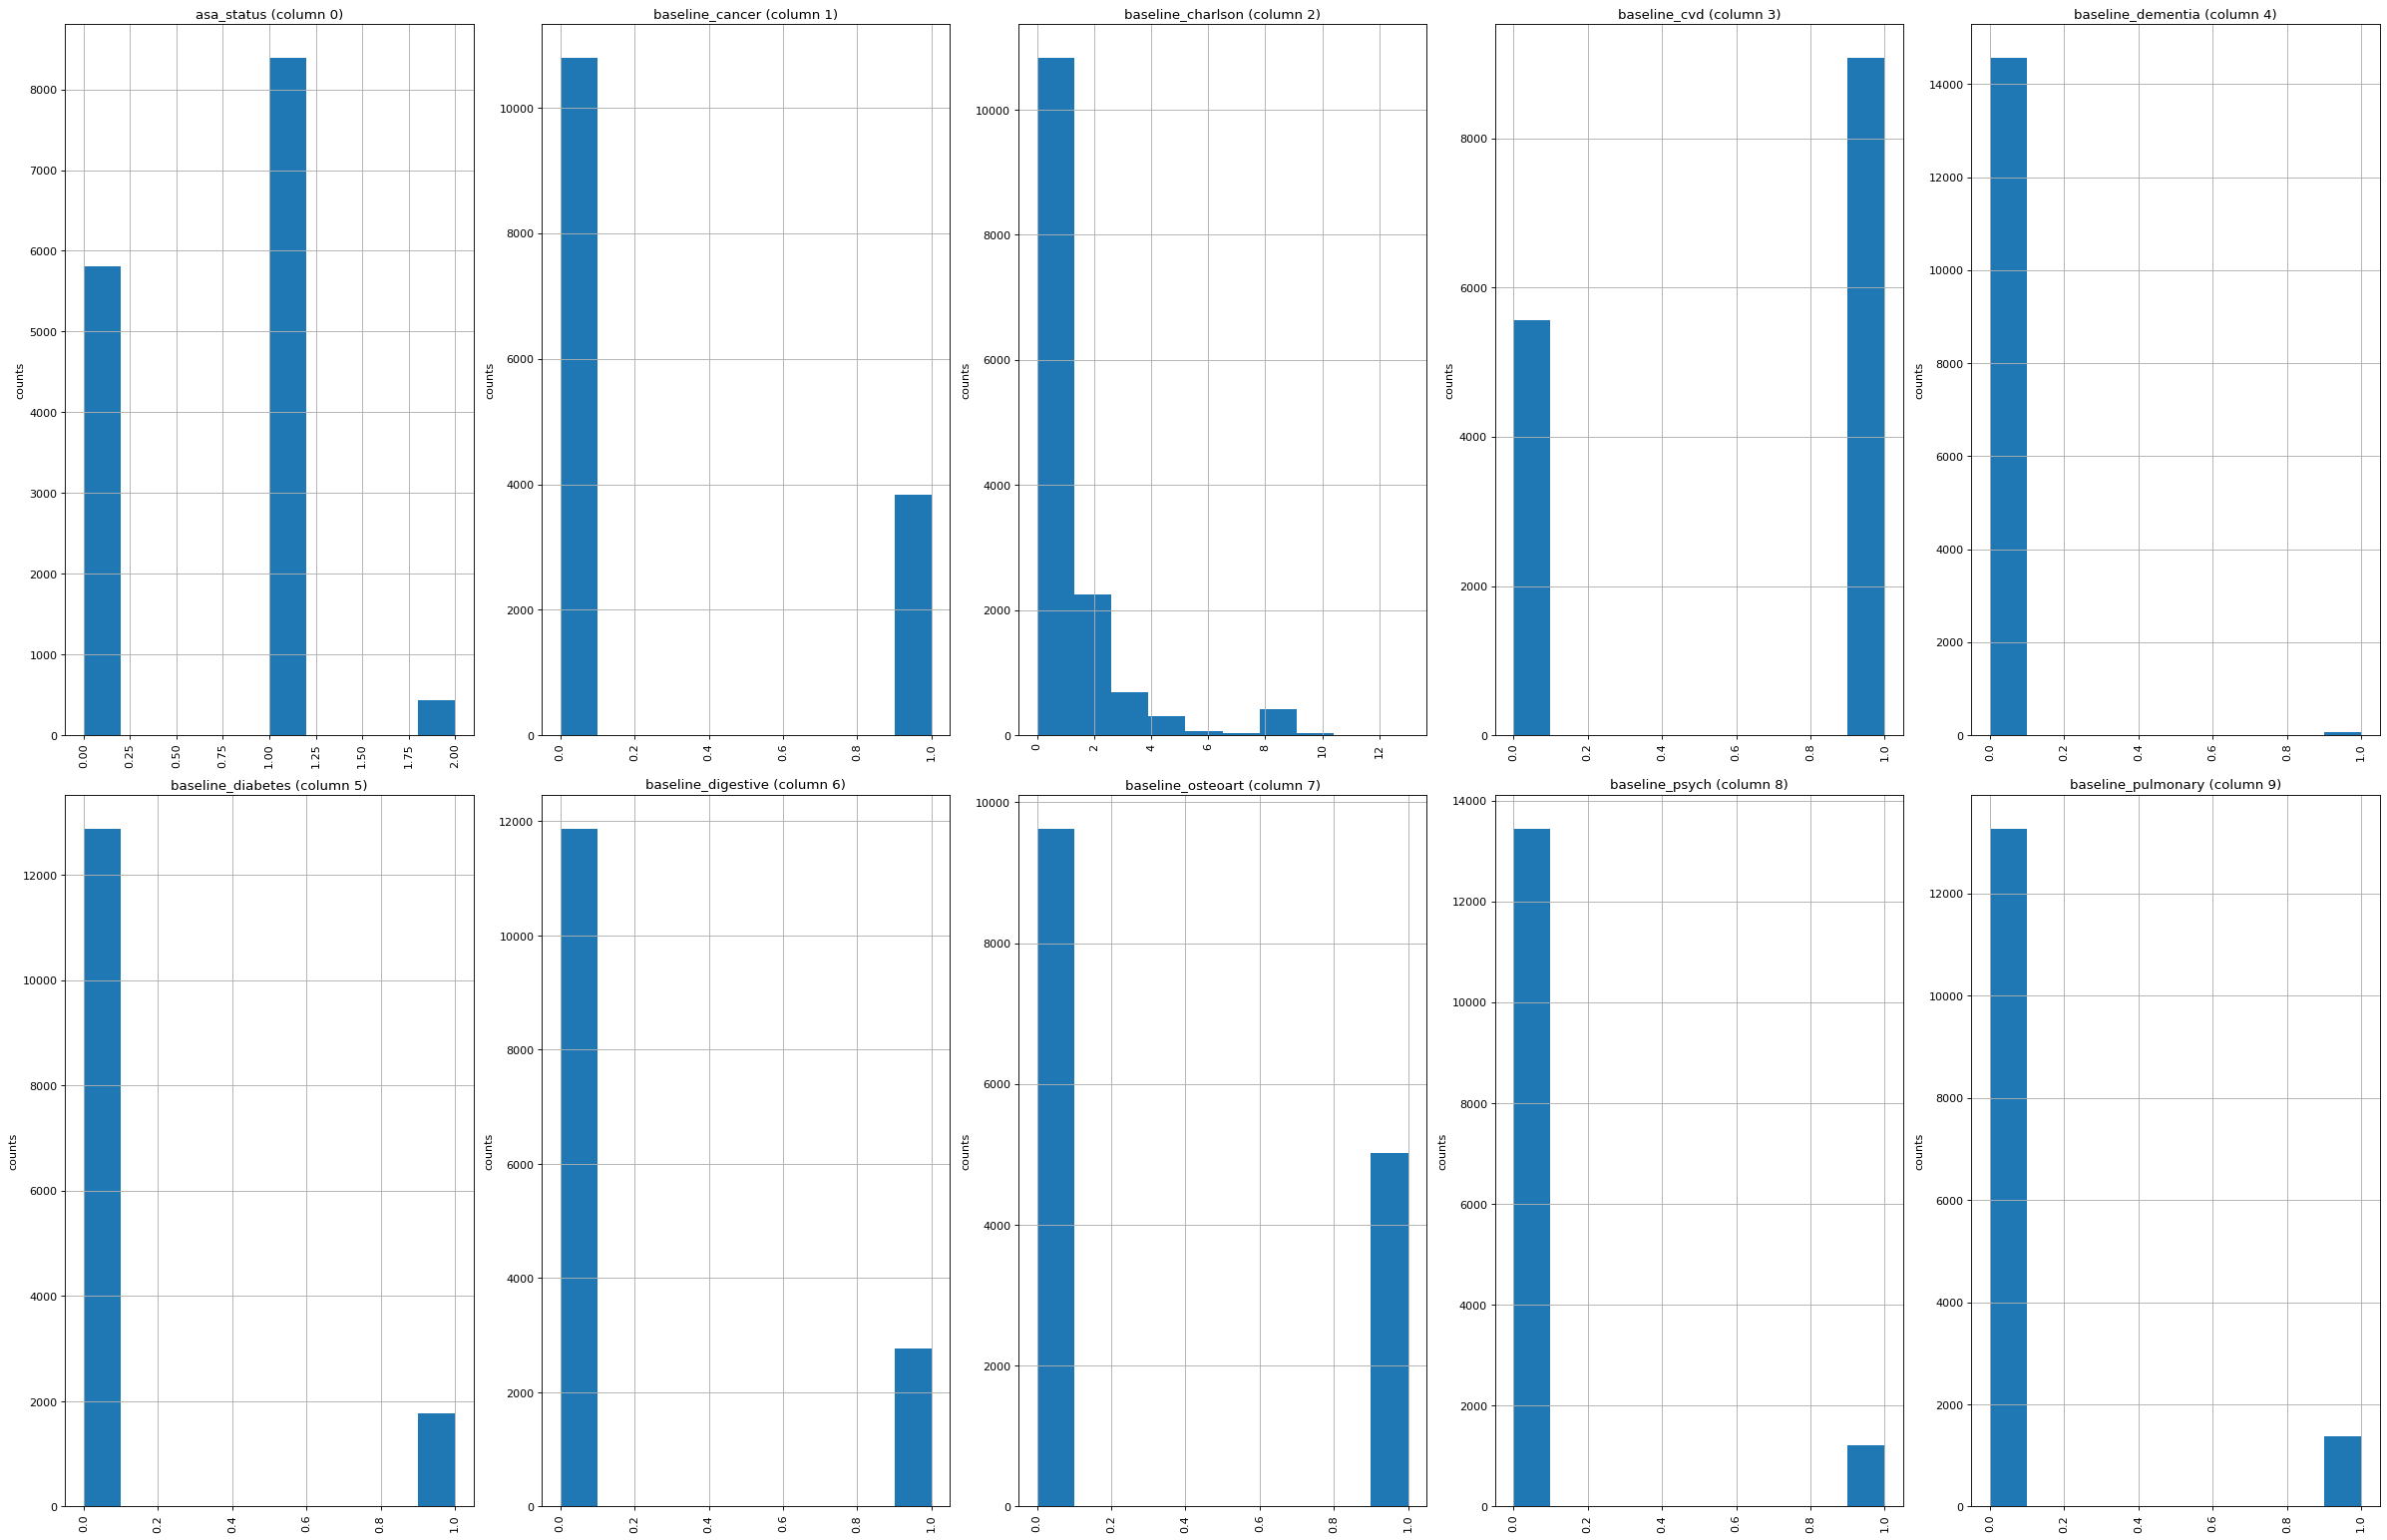

In [ ]:
plotHistogram(data, 10, 5)

Las barras separadas entre 0 y 1 son típicas de valores discretos y binarios.

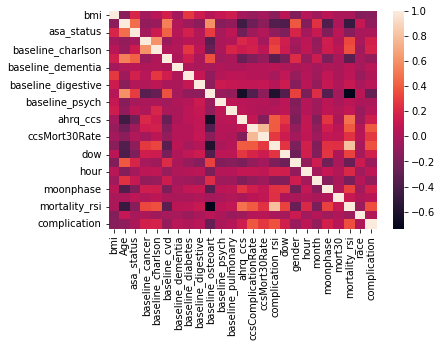

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot = False);

#sns.heatmap(data.corr(), annot = True);
#annot = True adds the numbers onto the squares
#en este caso las anotaciones no son practicas porque hay muchisimas celdas y el texto es ilegible

La matriz de correlación no arroja correlaciones entre variables muy marcadas.

In [ ]:
import numpy as np # linear algebra

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr = %.3f' % corrs[i, j], (0.5, 0.1), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  import sys


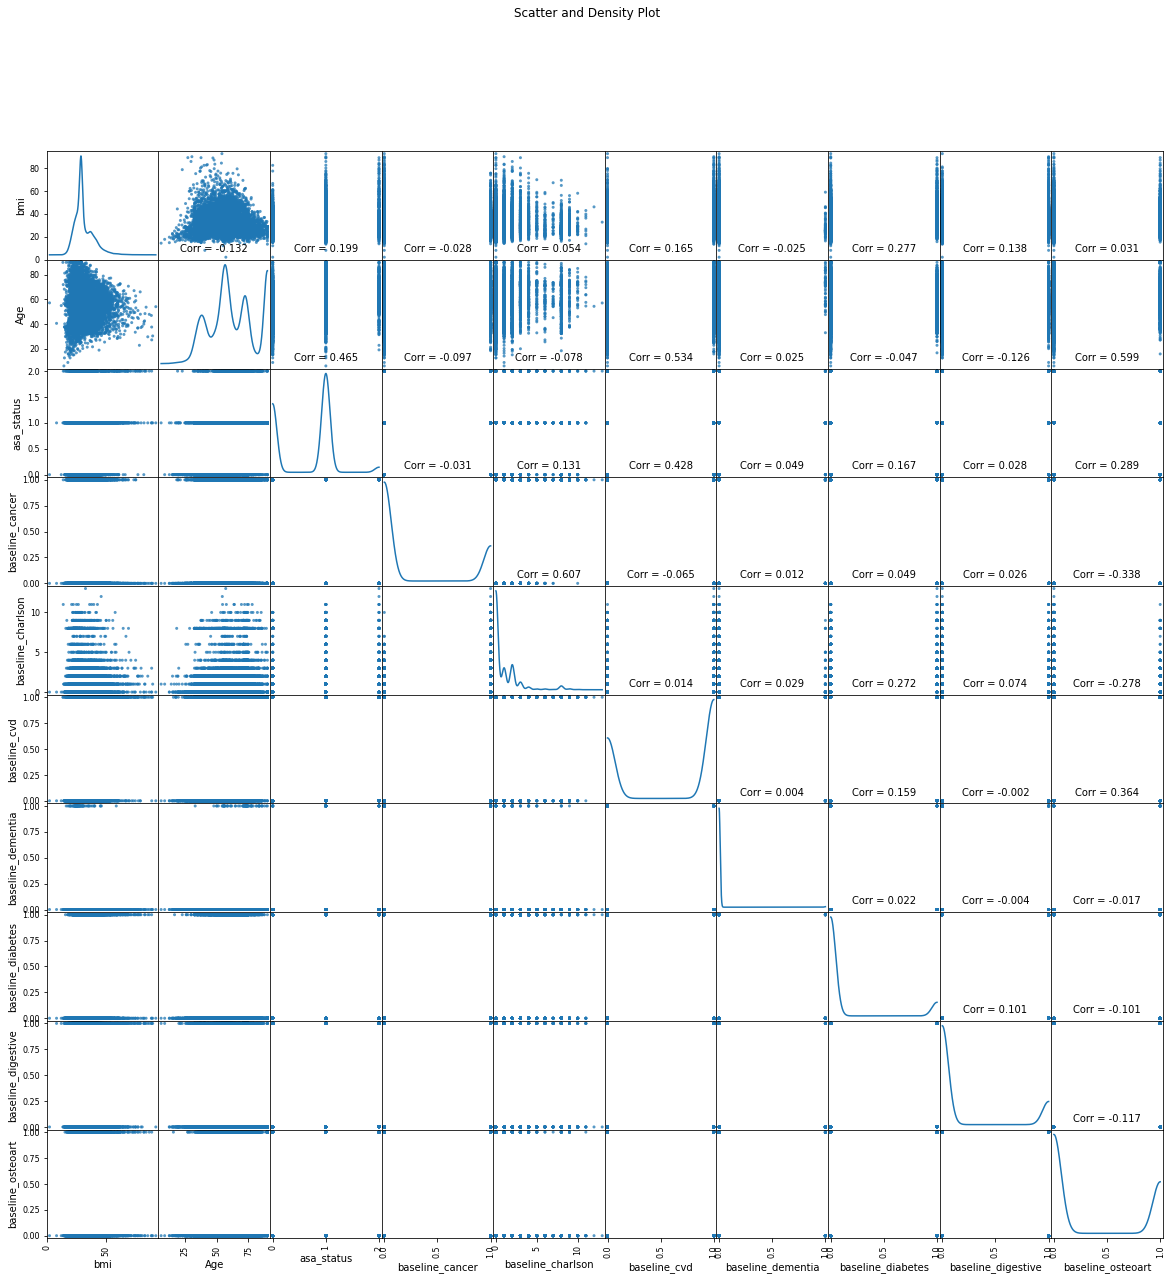

In [ ]:
plotScatterMatrix(data, 20, 10)

In [ ]:
#Nice plot but heavy ... It takes forever
#import seaborn as sns
#sns.set_theme(style="ticks")
#sns.pairplot(data, hue="complication")

La matriz de gráficos de dispersión no permite evidenciar correlaciones muy marcadas entre variables. Llama la atención la correlación existente entre osteoartritis y la edad del paciente, que se asocia una correlación de 0,6 aprox.

##Distribución de Categorías

Para revisar si estamos en presencia de desbalance de clases, realizamos un grafico de barra para la variable objetivo.[link text](https://)

Text(0, 0.5, 'Count')

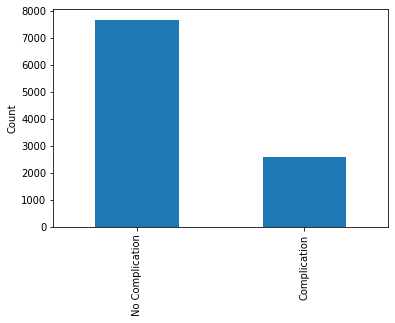

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Complication', 'Complication'])
plt.ylabel('Count')

Existe un desbalance marcado entre las clases, existiendo el triple de casos aproximadamente en donde no hubo complicación después de la cirugía. En situaciones como ésta puede ser desaconsejable usar la certeza como medida de desempeño. En este caso se opta por usar F-Score. 

#STEP 4: MODEL


## Métrica
F1-Score es la métrica de clasificación escogida para juzgar la eficacia del clasificador. La F1-Score es más robusta al desbalance de clases que la precisión, que es más apropiada cuando las clases están aproximadamente equilibradas. F1-Score puede calcularse como sigue:


$$
\mathsf{F1-Score} = \frac{2 \times \mathsf{precision}\times \mathsf{recall}}{\mathsf{precision} + \mathsf{recall}}
$$

donde la precisión (precision) es la fracción de positivos predichos que se predijeron correctamente, y la recuperación (recall) es la fracción de casos positivos verdaderos que se predijeron correctamente.

## Aprendizaje Supervisado
Primero entrenamremos un clasificador supervisado utilizando solo los datos de entrenamiento etiquetados. Para ello usaremos Regresion Logistica que es un clasificador muy simple. El objetivo es tener una medicion base para poder observar que tan buena es la opcion semi-supervisada.


Train f1 Score: 0.4708554125662377
Test f1 Score: 0.46946107784431146


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


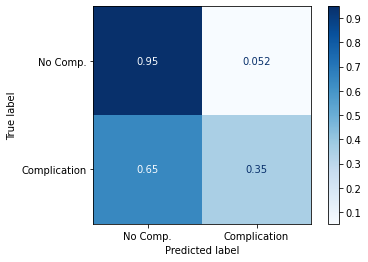

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true', display_labels=['No Comp.', 'Complication']);

## Aprendizaje Semi-Supervisado

Ahora inicializamos un modelo Self-Training

Pseudocódigo:

1.   Entrenar el clasificador de Regresión Logística en los datos de entrenamiento etiquetados.
2.   Utilizar el clasificador para predecir las etiquetas de todos los datos no etiquetados.
3.   Concatenar los datos pseudo-etiquetados con los datos de entrenamiento etiquetados.
4.    Utilizar el clasificador entrenado para hacer predicciones para los datos de prueba etiquetados.

In [ ]:
# Initiate iteration counter
iterations = 0
## umbral de probabilidad aceptable para agregar instancias sin etiquetar
umbral=0.90

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_u)
    preds = clf.predict(X_u)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_u.index
    

    # Separate predictions with > 99% probability
    
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > umbral],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > umbral]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_u.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_u= X_u.drop(index=high_prob.index)
    print(f"{len(X_u)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.4708554125662377
Test f1: 0.46946107784431146
Now predicting labels for unlabeled data...
1731 high-probability predictions added to training data.
3391 unlabeled instances remaining.

Iteration 1
Train f1: 0.4864070536370315
Test f1: 0.47409172126265636
Now predicting labels for unlabeled data...
100 high-probability predictions added to training data.
3291 unlabeled instances remaining.

Iteration 2
Train f1: 0.48853099072718403
Test f1: 0.47409172126265636
Now predicting labels for unlabeled data...
12 high-probability predictions added to training data.
3279 unlabeled instances remaining.

Iteration 3
Train f1: 0.48952752070141253
Test f1: 0.47409172126265636
Now predicting labels for unlabeled data...
4 high-probability predictions added to training data.
3275 unlabeled instances remaining.

Iteration 4
Train f1: 0.49100631988332527
Test f1: 0.47409172126265636
Now predicting labels for unlabeled data...
3 high-probability predictions added to training data

#STEP 5: INTERPRET

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


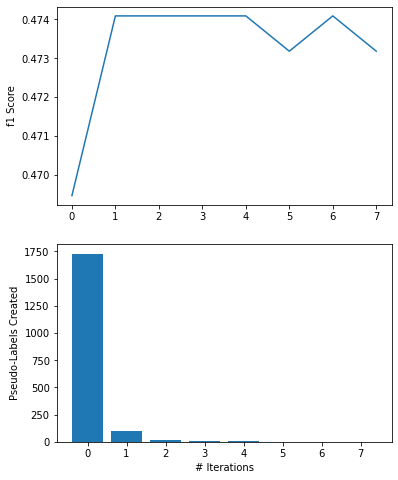

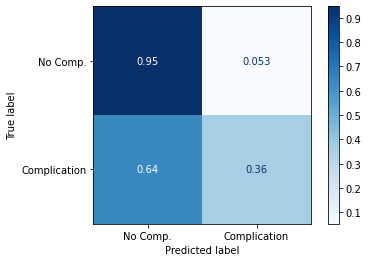

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Comp.', 'Complication']);

En este caso se muestra que la estrategia de auto entrenamiento produce consistentemente mejoras en la métrica utiliza.
Además, dado el umbral de un 90% de probabilidad escogido, se observa que en la primera iteración cerca de 1750 instancias sin etiquetar fueron pseudo etiquetadas y agregadas al conjunto de entrenamiento. Las subsiguientes integraciones sólo consiguieron agregar unas pocas extra.
Finalmente la matriz confusión muestra una mejora marginal en la predicción de las complicaciones después de las cirugías.

In [ ]:

from sklearn.semi_supervised import SelfTrainingClassifier

#self_training_model = SelfTrainingClassifier(base_estimator=svc)
self_training_clf = SelfTrainingClassifier(base_estimator=LogisticRegression(max_iter=1000),threshold=umbral)
y_hat_train = self_training_clf.predict(X_train)
y_hat_test = self_training_clf.predict(X_test)

# Calculate and print iteration # and f1 scores, and store f1 scores
train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)
#print(f"Iteration {iterations}")
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

NotFittedError: ignored

In [ ]:
##https://towardsdatascience.com/self-training-classifier-how-to-make-any-algorithm-behave-like-a-semi-supervised-one-2958e7b54ab7

########## Step 1 - Data Prep ########## 
# Select data for modeling - we are including masked (-1) labels this time
X_train=df_train[['MntMeatProducts', 'MntWines']]
y_train=df_train['Dependents_Target'].values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model_svc = SVC(kernel='rbf', 
                probability=True, # Need to enable to be able to use predict_proba
                C=1.0, # default = 1.0
                gamma='scale', # default = 'scale',
                random_state=0
               )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


########## Step 3 - Model Evaluation ########## 
print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
#print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Feature Names: ', clf_ST.feature_names_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
# Look at classification report to evaluate the model
print(classification_report(y_test, clf_ST.predict(X_test)))

## Comentarios finales
¿hay algún riesgo en realizar el autoentrenamiento con tantos datos sin etiquetar? La respuesta, por supuesto, es que sí. 

Hay que recordar que, aunque incluyamos nuestros datos "pseudoetiquetados" con los datos de entrenamiento etiquetados, algunos de los datos "pseudoetiquetados" serán ciertamente incorrectos.

Si un número suficiente de "pseudoetiquetas" es incorrecto, el algoritmo de auto-entrenamiento (self-training) puede llevar a decisiones de clasificación erróneas y el rendimiento del clasificador puede empeorar.

Sin embargo, este riesgo puede mitigarse siguiendo prácticas establecidas como el uso de un conjunto de datos de prueba que el clasificador no ha visto durante el entrenamiento, o el uso de un umbral de probabilidad para la predicción de la 'pseudo-etiqueta'.

Por último en este ejemplo se uso regresión logística que es simple. Además, los resultados finales mejoran marginalmente usando la estrategia de auto entrenamiento. Sin embargo, deberá quedar en la retina que el método puede llevar a excelentes mejoras en determinados contextos.